In [11]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [12]:
# Directories for resized faces
real_resized_faces_dir = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/resized/real'
fake_resized_faces_dir = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/resized/fake'

# Directories to save equalized faces
real_equalized_faces_dir = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/equalized_faces/real'
fake_equalized_faces_dir = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/equalized_faces/fake'
os.makedirs(real_equalized_faces_dir, exist_ok=True)
os.makedirs(fake_equalized_faces_dir, exist_ok=True)


In [13]:
# Function to equalize histogram of an image
def equalize_histogram(image_path, save_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized_image = cv2.equalizeHist(image)
    cv2.imwrite(save_path, equalized_image)

# Function to equalize histograms of all images in a directory with progress bar
def equalize_histograms_in_directory(input_dir, output_dir):
    file_list = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]
    for file_name in tqdm(file_list, desc=f"Equalizing histograms in {input_dir}"):
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name)
        equalize_histogram(input_path, output_path)

# Equalize histograms of real faces with progress
equalize_histograms_in_directory(real_resized_faces_dir, real_equalized_faces_dir)

# Equalize histograms of fake faces with progress
equalize_histograms_in_directory(fake_resized_faces_dir, fake_equalized_faces_dir)


Equalizing histograms in C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/resized/real: 100%|█| 1657
Equalizing histograms in C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/resized/fake: 100%|█| 1358


Real Faces:


Displaying real images:   0%|                                                                 | 0/5 [00:00<?, ?it/s]

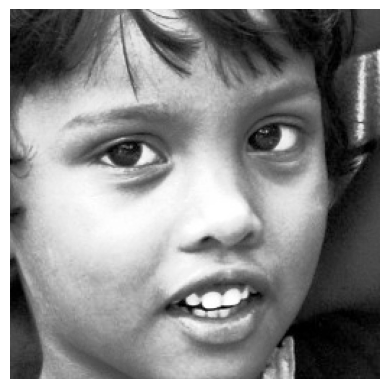

Displaying real images:  20%|███████████▍                                             | 1/5 [00:00<00:00,  7.41it/s]

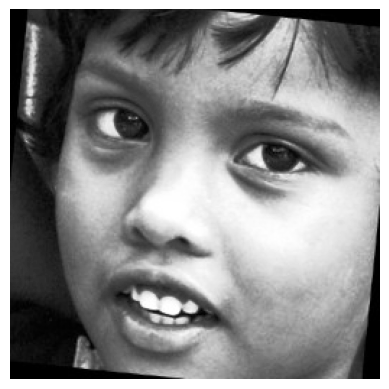

Displaying real images:  40%|██████████████████████▊                                  | 2/5 [00:00<00:00,  7.64it/s]

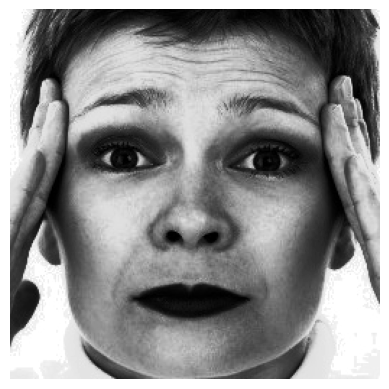

Displaying real images:  60%|██████████████████████████████████▏                      | 3/5 [00:00<00:00,  7.53it/s]

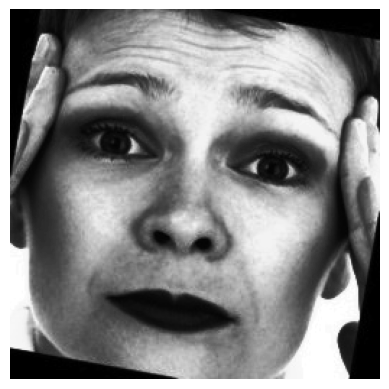

Displaying real images:  80%|█████████████████████████████████████████████▌           | 4/5 [00:00<00:00,  7.17it/s]

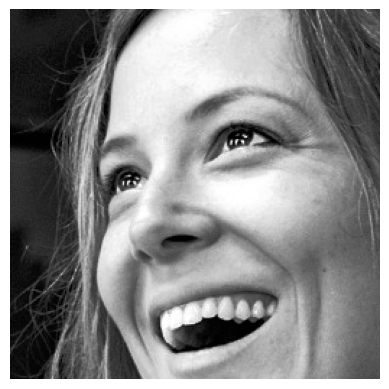

Displaying real images: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.32it/s]


Fake Faces:


Displaying fake images:   0%|                                                                 | 0/5 [00:00<?, ?it/s]

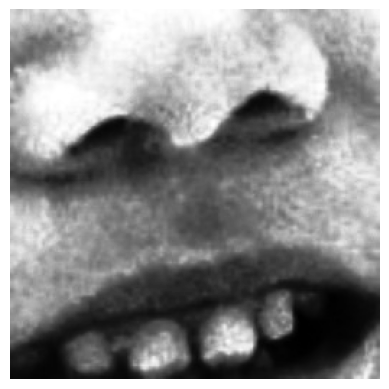

Displaying fake images:  20%|███████████▍                                             | 1/5 [00:00<00:00,  6.06it/s]

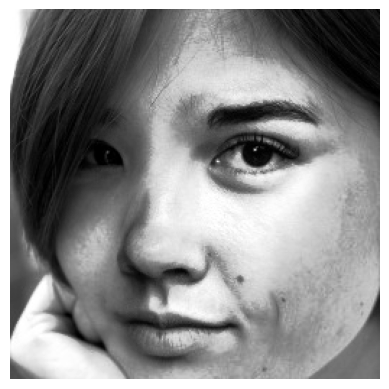

Displaying fake images:  40%|██████████████████████▊                                  | 2/5 [00:00<00:00,  6.40it/s]

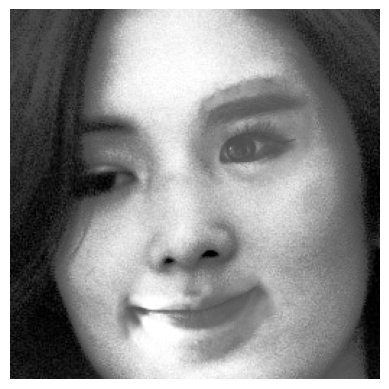

Displaying fake images:  60%|██████████████████████████████████▏                      | 3/5 [00:00<00:00,  6.82it/s]

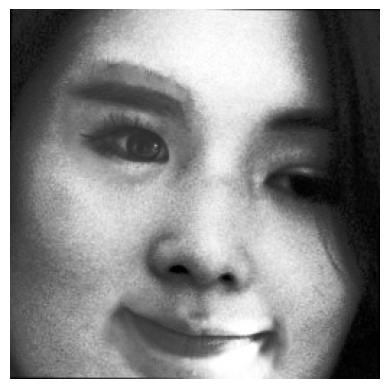

Displaying fake images:  80%|█████████████████████████████████████████████▌           | 4/5 [00:00<00:00,  7.27it/s]

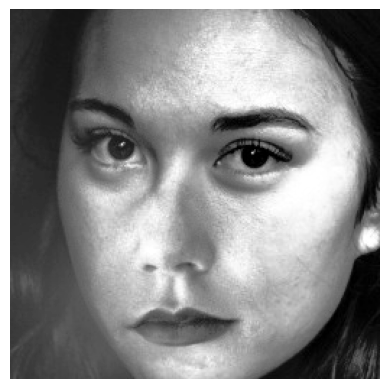

Displaying fake images: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.56it/s]


In [14]:
# Function to display an image
def display_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Display some equalized images for real faces with progress
print("Real Faces:")
real_files = os.listdir(real_equalized_faces_dir)[:5]
for file_name in tqdm(real_files, desc="Displaying real images"):
    display_image(os.path.join(real_equalized_faces_dir, file_name))

# Display some equalized images for fake faces with progress
print("Fake Faces:")
fake_files = os.listdir(fake_equalized_faces_dir)[:5]
for file_name in tqdm(fake_files, desc="Displaying fake images"):
    display_image(os.path.join(fake_equalized_faces_dir, file_name))
